In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder 
import sklearn
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from ThyroidDataProcess import data_processing, get_Xy
from sklearn.preprocessing import OneHotEncoder

In [3]:
train_df_ave_path = 'fillna_training_average.json'

In [4]:
df = data_processing("allhypo.data.txt", train_df_ave_path)

In [5]:
feature_cat = [ 'sex', 'on thyroxine', 'query on thyroxine','on antithyroid medication', 'sick',
               'pregnant', 'thyroid surgery','I131 treatment', 'query hypothyroid', 
               'query hyperthyroid', 'lithium', 'goitre', 'tumor', 'hypopituitary', 'psych', 
               'TSH measured', 'T3 measured', 'TT4 measured', 'T4U measured', 'FTI measured', 'referral source']

In [6]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split

In [7]:
def classification_report_df(report_in):
    rep = report_in.split('\n')
    column_names = ['class']
    report_out =[]
    for i in rep[0].split():
        column_names.append(i)
    for row in rep[2:6]:
        report_out.append(row.split())
    if rep[6]!='':
        report_out.append(rep[6].split('      '))
    elif rep[6]=='' and rep[7]!='':
        report_out.append(rep[7].split('      '))
        
    report_df = pd.DataFrame(report_out)
    report_df.columns = column_names
    return report_df 

### Numeric feature selection

In [8]:
feature_num = ['age','TSH_ln','T3', 'TT4', 'T4U', 'FTI']

In [9]:
leng = len(feature_num)

In [10]:
y_cv_pred_dict ={}
for i in range(leng):
    feature_num = ['age','TSH_ln','T3', 'TT4', 'T4U', 'FTI']
    popped = feature_num.pop(i)
    X, y = get_Xy(df, feature_cat, feature_num)
    X_train, X_cv, y_train, y_cv = train_test_split(X, y, test_size=0.33, random_state=101)
    xgb = XGBClassifier()
    xgb_model = xgb.fit(X_train, y_train)
    # y_train_pred = xgb_model.predict(X_train)
    y_cv_pred = xgb_model.predict(X_cv)
    report_df = classification_report_df(classification_report(y_cv, y_cv_pred))
    y_cv_pred_dict["missing " + popped] = report_df
    print(f"CV Prediction with missing {popped} column\n", classification_report(y_cv, y_cv_pred))

/home/jun3/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:325: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif self.n_values is not None and self.n_values != 'auto':
/home/jun3/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:331: DeprecationWarning: Passing 'n_values' is deprecated in version 0.20 and will be removed in 0.22. You can use the 'categories' keyword instead. 'n_values=n' corresponds to 'categories=[range(n)]'.
  warnings.warn(msg, DeprecationWarning)


CV Prediction with missing age column
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       856
           1       0.96      0.96      0.96        24
           2       0.98      1.00      0.99        44

   micro avg       1.00      1.00      1.00       924
   macro avg       0.98      0.99      0.98       924
weighted avg       1.00      1.00      1.00       924



/home/jun3/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:325: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif self.n_values is not None and self.n_values != 'auto':
/home/jun3/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:331: DeprecationWarning: Passing 'n_values' is deprecated in version 0.20 and will be removed in 0.22. You can use the 'categories' keyword instead. 'n_values=n' corresponds to 'categories=[range(n)]'.
  warnings.warn(msg, DeprecationWarning)


CV Prediction with missing TSH_ln column
               precision    recall  f1-score   support

           0       0.95      0.99      0.97       856
           1       0.83      0.79      0.81        24
           2       0.40      0.05      0.08        44

   micro avg       0.94      0.94      0.94       924
   macro avg       0.72      0.61      0.62       924
weighted avg       0.92      0.94      0.92       924



/home/jun3/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:325: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif self.n_values is not None and self.n_values != 'auto':
/home/jun3/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:331: DeprecationWarning: Passing 'n_values' is deprecated in version 0.20 and will be removed in 0.22. You can use the 'categories' keyword instead. 'n_values=n' corresponds to 'categories=[range(n)]'.
  warnings.warn(msg, DeprecationWarning)


CV Prediction with missing T3 column
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       856
           1       0.96      0.96      0.96        24
           2       0.98      1.00      0.99        44

   micro avg       1.00      1.00      1.00       924
   macro avg       0.98      0.99      0.98       924
weighted avg       1.00      1.00      1.00       924



/home/jun3/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:325: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif self.n_values is not None and self.n_values != 'auto':
/home/jun3/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:331: DeprecationWarning: Passing 'n_values' is deprecated in version 0.20 and will be removed in 0.22. You can use the 'categories' keyword instead. 'n_values=n' corresponds to 'categories=[range(n)]'.
  warnings.warn(msg, DeprecationWarning)
/home/jun3/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/home/jun3/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:325: FutureWarning: elementwise comparison failed; returning scalar inst

CV Prediction with missing TT4 column
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       856
           1       0.96      0.92      0.94        24
           2       0.96      1.00      0.98        44
           3       0.00      0.00      0.00         0

   micro avg       0.99      0.99      0.99       924
   macro avg       0.73      0.73      0.73       924
weighted avg       1.00      0.99      1.00       924

CV Prediction with missing T4U column
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       856
           1       0.96      0.96      0.96        24
           2       0.98      1.00      0.99        44

   micro avg       1.00      1.00      1.00       924
   macro avg       0.98      0.99      0.98       924
weighted avg       1.00      1.00      1.00       924



/home/jun3/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:325: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif self.n_values is not None and self.n_values != 'auto':
/home/jun3/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:331: DeprecationWarning: Passing 'n_values' is deprecated in version 0.20 and will be removed in 0.22. You can use the 'categories' keyword instead. 'n_values=n' corresponds to 'categories=[range(n)]'.
  warnings.warn(msg, DeprecationWarning)


CV Prediction with missing FTI column
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       856
           1       0.95      0.79      0.86        24
           2       0.88      1.00      0.94        44

   micro avg       0.99      0.99      0.99       924
   macro avg       0.94      0.93      0.93       924
weighted avg       0.99      0.99      0.99       924



In [11]:
def predict_with_miss(predict_dict, disease_class=0):
    missing_col_names = []
    f1_scores = []
    for i in predict_dict.keys():
        missing_col_names.append(i)
        f1_scores.append(float(predict_dict[i]["f1-score"][disease_class]))
    return missing_col_names, f1_scores        

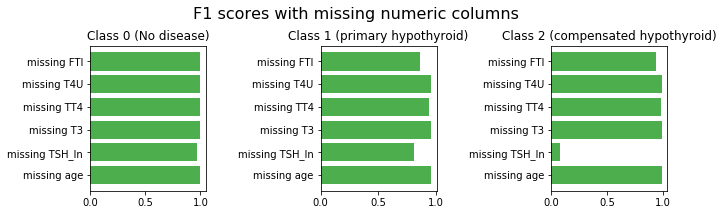

In [12]:
fig, ax = plt.subplots(1, 3, figsize=(10, 3))
fig.suptitle("F1 scores with missing numeric columns", size=16)
for i in range(3):
    
    class_names, f1_scores = predict_with_miss(y_cv_pred_dict, disease_class=i)
    ax[i].barh(class_names, f1_scores, color = 'tab:green', alpha = 0.85)
    titles = ["Class 0 (No disease)",
             "Class 1 (primary hypothyroid)",
             "Class 2 (compensated hypothyroid)"]
    ax[i].set_title(titles[i])
    plt.tight_layout()
plt.subplots_adjust(top=0.80)

#### Missing log_transformed_TSH, FTI and TT4 negatively affected class 1 primary hypothyroid prediction the most.

#### Missing log_transformed_TSH, FTI and TT4 negatively affected class 2 compensated hypothyroid prediction.  It's impossible to predict class 2 hypothyroid with log_transformed_TSH data missing.

### Categorical feature selection

In [13]:
feature_cat_cols = [ 'sex', 'on thyroxine', 'query on thyroxine','on antithyroid medication', 'sick',
               'pregnant', 'thyroid surgery','I131 treatment', 'query hypothyroid', 
               'query hyperthyroid', 'lithium', 'goitre', 'tumor', 'hypopituitary', 'psych', 
               'TSH measured', 'T3 measured', 'TT4 measured', 'T4U measured', 'FTI measured', 'referral source']

In [14]:
feature_num = ['age','TSH_ln','T3', 'TT4', 'T4U', 'FTI']

In [15]:
cat_len = len(feature_cat_cols)
cat_len

21

In [16]:
y_cv_pred_dict_cat ={}
for i in range(cat_len):
    feature_cat = [ 'sex', 'on thyroxine', 'query on thyroxine','on antithyroid medication', 'sick',
               'pregnant', 'thyroid surgery','I131 treatment', 'query hypothyroid', 
               'query hyperthyroid', 'lithium', 'goitre', 'tumor', 'hypopituitary', 'psych', 
               'TSH measured', 'T3 measured', 'TT4 measured', 'T4U measured', 'FTI measured', 'referral source']
    popped = feature_cat.pop(i)
    onehot_encoder = OneHotEncoder(sparse=False,  handle_unknown='ignore')
    
    X_cat = onehot_encoder.fit_transform(df[feature_cat])
    X_num = df[feature_num].values
    X = np.concatenate((X_num, X_cat), axis=1) 
    y = df['classes'].values.astype(int)
    
    X_train, X_cv, y_train, y_cv = train_test_split(X, y, test_size=0.33, random_state=101)
    xgb = XGBClassifier()
    
    xgb_model = xgb.fit(X_train, y_train)
    # y_train_pred = xgb_model.predict(X_train)
    y_cv_pred = xgb_model.predict(X_cv)
    report_df = classification_report_df(classification_report(y_cv, y_cv_pred))
    y_cv_pred_dict_cat["missing " + popped] = report_df
    print(f"CV Prediction with missing {popped} column\n", classification_report(y_cv, y_cv_pred))

CV Prediction with missing sex column
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       856
           1       0.96      0.96      0.96        24
           2       0.98      1.00      0.99        44

   micro avg       1.00      1.00      1.00       924
   macro avg       0.98      0.99      0.98       924
weighted avg       1.00      1.00      1.00       924

CV Prediction with missing on thyroxine column
               precision    recall  f1-score   support

           0       1.00      0.98      0.99       856
           1       0.96      0.92      0.94        24
           2       0.69      0.95      0.80        44

   micro avg       0.98      0.98      0.98       924
   macro avg       0.88      0.95      0.91       924
weighted avg       0.98      0.98      0.98       924

CV Prediction with missing query on thyroxine column
               precision    recall  f1-score   support

           0       1.00      1.00      1.0

CV Prediction with missing referral source column
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       856
           1       0.96      0.96      0.96        24
           2       0.96      1.00      0.98        44

   micro avg       1.00      1.00      1.00       924
   macro avg       0.97      0.99      0.98       924
weighted avg       1.00      1.00      1.00       924



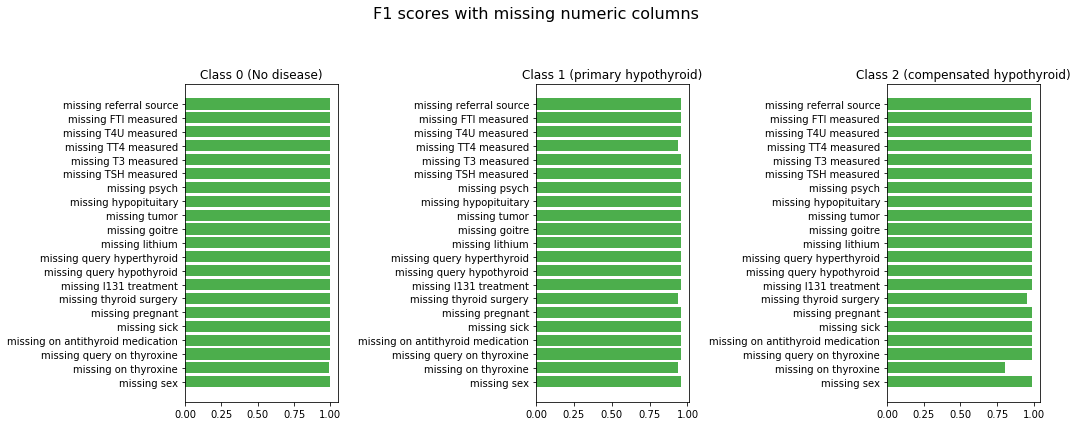

In [17]:
fig, ax = plt.subplots(1, 3, figsize=(15, 6))
fig.suptitle("F1 scores with missing numeric columns", size=16)
for i in range(3):
    
    class_names, f1_scores = predict_with_miss(y_cv_pred_dict_cat, disease_class=i)
    ax[i].barh(class_names, f1_scores, color = 'tab:green', alpha = 0.85)
    titles = ["Class 0 (No disease)",
             "Class 1 (primary hypothyroid)",
             "Class 2 (compensated hypothyroid)"]
    ax[i].set_title(titles[i])
    plt.tight_layout()
plt.subplots_adjust(top=0.80)

In [18]:
df_pred_all_features = pd.read_csv("XGBoost classification on cross_validation data.csv")
df_pred_all_features

,class,precision,recall,f1-score,support
0,0,1.00,1.00,1.00,856.0
1,1,0.96,0.96,0.96,24.0
2,2,0.98,1.00,0.99,44.0
3,NaN,NaN,NaN,NaN,NaN
4,micro avg,1.00,1.00,1.00,924.0


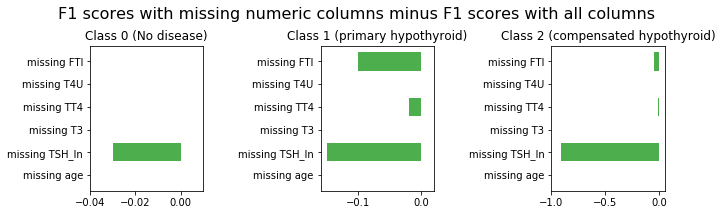

In [19]:
fig, ax = plt.subplots(1, 3, figsize=(10, 3))
fig.suptitle("F1 scores with missing numeric columns minus F1 scores with all columns", size=16)
for i in range(3):
    
    class_names, f1_scores = predict_with_miss(y_cv_pred_dict, disease_class=i)
    diff = f1_scores-df_pred_all_features.loc[i, "f1-score"]
    ax[i].barh(class_names, diff, color = 'tab:green', alpha = 0.85)
    x_lim_val = [(-0.04, 0.01), (-0.16, 0.02), (-1, 0.05)]
    ax[i].set_xlim(x_lim_val[i])
    titles = ["Class 0 (No disease)",
             "Class 1 (primary hypothyroid)",
             "Class 2 (compensated hypothyroid)"]
    ax[i].set_title(titles[i])
    plt.tight_layout()
plt.subplots_adjust(top=0.80)
plt.savefig("Missing numeric feature comparison.png", dpi=110)

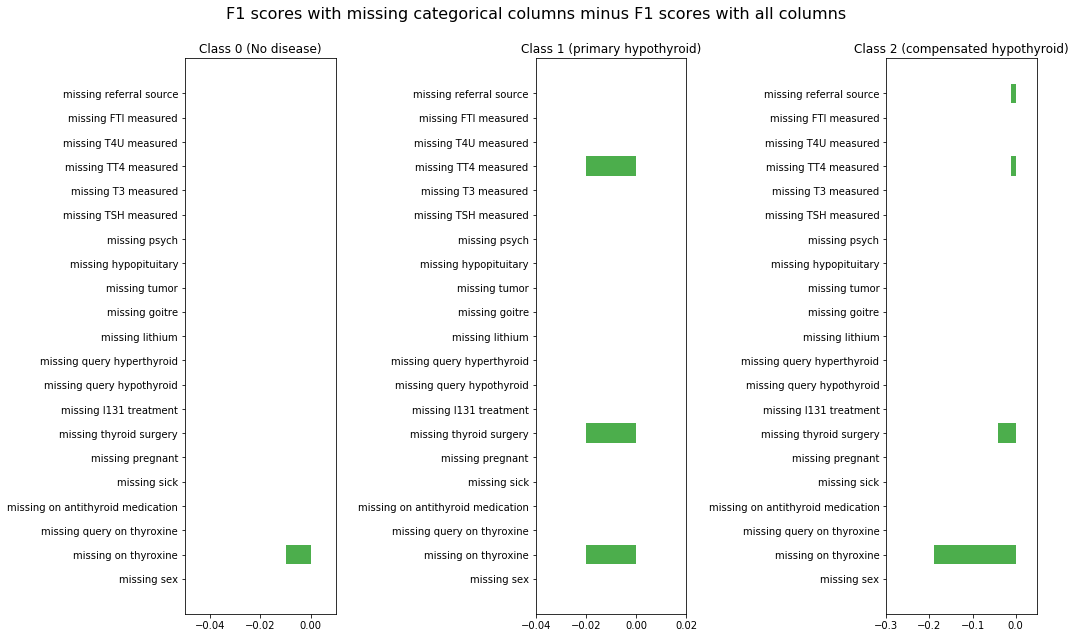

In [20]:
fig, ax = plt.subplots(1, 3, figsize=(15, 9))
fig.suptitle("F1 scores with missing categorical columns minus F1 scores with all columns", size=16)
for i in range(3):
    class_miss_cat_names, f1_scores = predict_with_miss(y_cv_pred_dict_cat, disease_class=i)
    diff = f1_scores - df_pred_all_features.loc[i, "f1-score"]
    ax[i].barh(class_miss_cat_names, diff, color = 'tab:green', alpha = 0.85)
    x_lim_val = [(-0.05, 0.01), (-0.04, 0.02), (-0.3, 0.05)]
    ax[i].set_xlim(x_lim_val[i])
    titles = ["Class 0 (No disease)",
             "Class 1 (primary hypothyroid)",
             "Class 2 (compensated hypothyroid)"]
    ax[i].set_title(titles[i])
    plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.savefig("Missing categorical feature comparison.png", dpi=90)

In [21]:
mini_model_features = ["TSH_ln", "TT4", "FTI", "on thyroxine", "thyroid surgery", "TT4 measured", "referral source"]

In [22]:
df_mini = df[mini_model_features]

In [23]:
df_mini.head()

,TSH_ln,TT4,FTI,on thyroxine,thyroid surgery,TT4 measured,referral source
0,0.262364,125.0,109.000000,0,0,1,3
1,1.410987,102.0,110.788002,0,0,1,0
2,-0.020203,109.0,120.000000,0,0,1,0
3,-1.832582,175.0,110.788002,1,0,1,0
4,-0.328504,61.0,70.000000,0,0,1,1


In [24]:
cat_feat_mini = ["on thyroxine", "thyroid surgery", "TT4 measured", "referral source"]

In [25]:
onehot_enc_mini = OneHotEncoder(sparse=False)

In [26]:
Xmcat = onehot_enc_mini.fit_transform(df_mini[cat_feat_mini])

/home/jun3/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [27]:
Xmcat.shape

(2800, 11)

In [28]:
Xmnum = df_mini[["TSH_ln", "TT4", "FTI"]].values

In [29]:
Xm = np.concatenate((Xmnum, Xmcat), axis=1)

In [30]:
Xm.shape

(2800, 14)

In [31]:
y = df['classes'].values

In [32]:
Xm_train, Xm_cv, y_train, y_cv = train_test_split(Xm, y, test_size=0.33, random_state=101)

In [33]:
xgb_model_mini = xgb.fit(Xm_train, y_train)

In [34]:
y_cv_pred_mini = xgb_model_mini.predict(Xm_cv)

In [35]:
print("Classification report on the cross-validation data with minimum feature model\n\n", classification_report(y_cv, y_cv_pred_mini))
print('Confusion_matrix\n\n', confusion_matrix(y_cv, y_cv_pred_mini))

Classification report on the cross-validation data with minimum feature model

               precision    recall  f1-score   support

           0       1.00      1.00      1.00       856
           1       0.96      0.92      0.94        24
           2       0.96      1.00      0.98        44

   micro avg       1.00      1.00      1.00       924
   macro avg       0.97      0.97      0.97       924
weighted avg       1.00      1.00      1.00       924

Confusion_matrix

 [[854   1   1]
 [  1  22   1]
 [  0   0  44]]


In [45]:
def class_reportDf(report):
    rep = report.split('\n')
    column_names = ['class']
    report_out =[]
    for i in rep[0].split():
        column_names.append(i)
    for row in rep[2:6]:
        report_out.append(row.split())
    if rep[6]!='':
        report_out.append(rep[6].split('      '))
    elif rep[6]=='' and rep[7]!='':
        report_out.append(rep[7].split('      '))
        
    report_df = pd.DataFrame(report_out)
    report_df.columns = column_names
    return report_df

In [57]:
XGB_MiniModel_cv_pred_df = class_reportDf(classification_report(y_cv, y_cv_pred_mini))
XGB_MiniModel_cv_pred_df.to_csv("XGBoost_mini classification on cross_validation data.csv", index=False)

In [58]:
XGB_MiniModel_cv_pred_df = pd.read_csv("XGBoost_mini classification on cross_validation data.csv")
XGB_MiniModel_cv_pred_df

,class,precision,recall,f1-score,support
0,0,1.00,1.00,1.00,856.0
1,1,0.96,0.92,0.94,24.0
2,2,0.96,1.00,0.98,44.0
3,NaN,NaN,NaN,NaN,NaN
4,micro avg,1.00,1.00,1.00,924.0


In [59]:
XGB_full_cv_pred_df = pd.read_csv("XGBoost classification on cross_validation data.csv")

In [60]:
XGB_full_cv_pred_df

,class,precision,recall,f1-score,support
0,0,1.00,1.00,1.00,856.0
1,1,0.96,0.96,0.96,24.0
2,2,0.98,1.00,0.99,44.0
3,NaN,NaN,NaN,NaN,NaN
4,micro avg,1.00,1.00,1.00,924.0


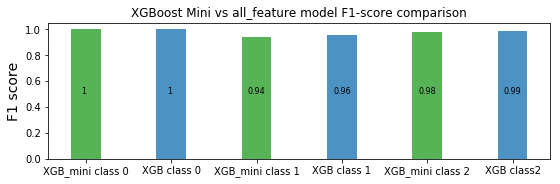

In [84]:
x = ["XGB_mini class 0", "XGB class 0", "XGB_mini class 1", "XGB class 1", "XGB_mini class 2", "XGB class2"]
height=[XGB_MiniModel_cv_pred_df.loc[0, "f1-score"], XGB_full_cv_pred_df.loc[0, "f1-score"], XGB_MiniModel_cv_pred_df.loc[1, "f1-score"], XGB_full_cv_pred_df.loc[1, "f1-score"], XGB_MiniModel_cv_pred_df.loc[2, "f1-score"], XGB_full_cv_pred_df.loc[2, "f1-score"]]
plt.figure(figsize = (9, 2.5))
labels = ["1", "1", "0.94", "0.96", "0.98", "0.99"]
positions = [-0.05, 0.95, 1.9, 2.9, 3.9, 4.9]
for i in range(6):
    plt.text(x=positions[i], y=0.5, s=labels[i], size=8)
plt.bar(x, height, width = 0.35, color = ['tab:green', 'tab:blue', 'tab:green', 'tab:blue', 'tab:green', 'tab:blue'], alpha=0.8)
plt.ylabel("F1 score", size=14)
plt.title("XGBoost Mini vs all_feature model F1-score comparison")
plt.savefig("XGB_Mini_vs_allfeatures.png", dpi=150)